ZOMATO RESTAURANT PROJECT

Since, this is both a Classification as well as Regression project, we import libraries accordingly.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

There are two datasets available for this project, we import them both and merge them

In [2]:
df1 = pd.read_excel("C:\\Users\\adwit\\Downloads\\Country-Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
df2 = pd.read_excel("C:\\Users\\adwit\\Downloads\\zomato.xlsx")
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df = pd.merge(df1,df2) 

In [5]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


Now, we can begin analysing our dataset:

- Check shape
- General Info
- Stats
- Null Values
- Duplicates

In [6]:
df.shape

(9551, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [8]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df = df.dropna()
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df = df.drop_duplicates()
df.shape

(9542, 22)

We can note, most of our columns are object columns, we need to see which of them is useful for our task and which are to be removed

In [11]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
current_categorical_columns = ['Country','Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose','Cuisines','Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

In [13]:
for i in current_categorical_columns:
    print(df[i].unique())

['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']
['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Tokyo Japanese Steak House' "Theo Yianni's Authentic Greek Restaurant"
 "Fishpatrick's Crabby Cafe"]
['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi' 'Noida'
 'Panchkula' 'Patna' 'Puducherry' 'Pune' 'Ranchi' 'Secunderabad' 'Surat'
 'Vadodara' 'Varanasi' 'Vizag' 'Armidale' 'Balingup' 'Beechworth'
 'Dicky Beach' 'East Ballina' 'Flaxton' 'Forrest' 'Hepburn Springs'
 'Huskisson' 'Inverloch' 'Lakes Entrance' 'Lorn' 'Macedon' 'Mayfield'
 'Middleton Beach' 'Montvill

In [14]:
df['Cuisines'].unique()

array(['North Indian, Mughlai', 'North Indian', 'Rajasthani', ...,
       'Coffee and Tea, Desserts, Beverages', 'Sandwich, Sushi, Tapas',
       'Burger, Greek, Sandwich'], dtype=object)

In [15]:
drop_columns_unnecessary = ['Country Code','Restaurant Name','Address','Locality','Locality Verbose']

In [16]:
df = df.drop(columns = drop_columns_unnecessary, axis=1)
df

,Country,Restaurant ID,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,3400025,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,India,3400341,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,India,3400005,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,India,3400021,Agra,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,India,3400017,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,United States,17697389,Waterloo,-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,United States,17697424,Waterloo,-92.335769,42.497919,Thai,10,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,United States,17697332,Waterloo,-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,United States,17694056,Weirton,-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


Changing categorical columns to Integers

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lab = LabelEncoder()

In [19]:
categorical_columns = ['Country','City','Cuisines','Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

In [20]:
for i in categorical_columns:
    df[i] = lab.fit_transform(df[i])
    
df

,Country,Restaurant ID,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3,3400025,1,78.011544,27.161661,1514,850,4,0,0,0,0,3,3.9,5,2,140
1,3,3400341,1,0.000000,0.000000,1514,700,4,0,0,0,0,2,3.5,5,2,71
2,3,3400005,1,78.011608,27.160832,1306,500,4,0,0,0,0,2,3.6,5,2,94
3,3,3400021,1,77.998092,27.195928,1645,400,4,0,0,0,0,2,4.0,1,5,87
4,3,3400017,1,78.007553,27.201725,1373,1000,4,0,0,0,0,3,4.2,1,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,14,17697389,134,-92.335523,42.498400,18,10,2,0,0,0,0,1,3.7,5,2,101
9547,14,17697424,134,-92.335769,42.497919,1795,10,2,0,0,0,0,1,3.5,5,2,58
9548,14,17697332,134,-92.323400,42.465580,1125,25,2,0,0,0,0,2,3.9,5,2,156
9549,14,17694056,135,-80.529488,40.396043,317,25,2,0,0,0,0,2,3.9,5,2,156


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               9542 non-null   int32  
 1   Restaurant ID         9542 non-null   int64  
 2   City                  9542 non-null   int32  
 3   Longitude             9542 non-null   float64
 4   Latitude              9542 non-null   float64
 5   Cuisines              9542 non-null   int32  
 6   Average Cost for two  9542 non-null   int64  
 7   Currency              9542 non-null   int32  
 8   Has Table booking     9542 non-null   int32  
 9   Has Online delivery   9542 non-null   int32  
 10  Is delivering now     9542 non-null   int32  
 11  Switch to order menu  9542 non-null   int32  
 12  Price range           9542 non-null   int64  
 13  Aggregate rating      9542 non-null   float64
 14  Rating color          9542 non-null   int32  
 15  Rating text          

In [22]:
df.describe()

,Country,Restaurant ID,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9542.000000,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.0,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,3.727101,9.043301e+06,77.570530,64.274997,25.848532,989.163173,1200.326137,3.979564,0.121358,0.256864,0.003563,0.0,1.804968,2.665238,2.952840,1.788933,156.772060
std,2.634405,8.791967e+06,22.781307,41.197602,11.010094,514.326600,16128.743876,0.912652,0.326560,0.436927,0.059589,0.0,0.905563,1.516588,1.492629,1.694795,430.203324
min,0.000000,5.300000e+01,0.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.019312e+05,78.250000,77.081565,28.478658,497.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000
50%,3.000000,6.002726e+06,87.000000,77.192031,28.570444,1126.000000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000
75%,3.000000,1.835260e+07,87.000000,77.282043,28.642711,1354.000000,700.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,130.000000
max,14.000000,1.850065e+07,139.000000,174.832089,55.976980,1824.000000,800000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000


Now that we have cleaned our dataset, we are ready to now begin visualizing it

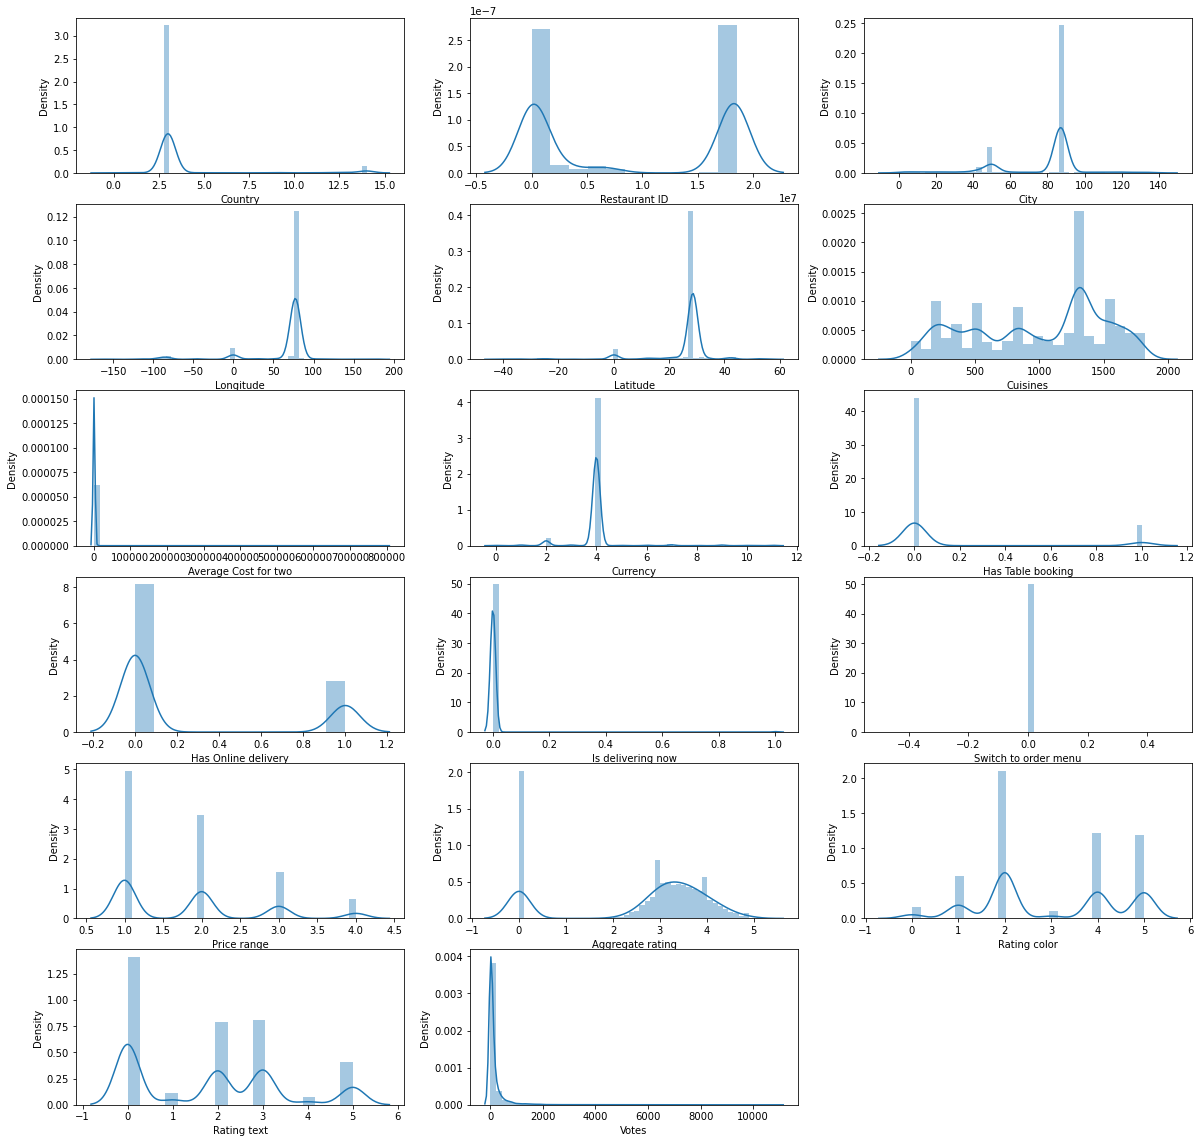

In [23]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

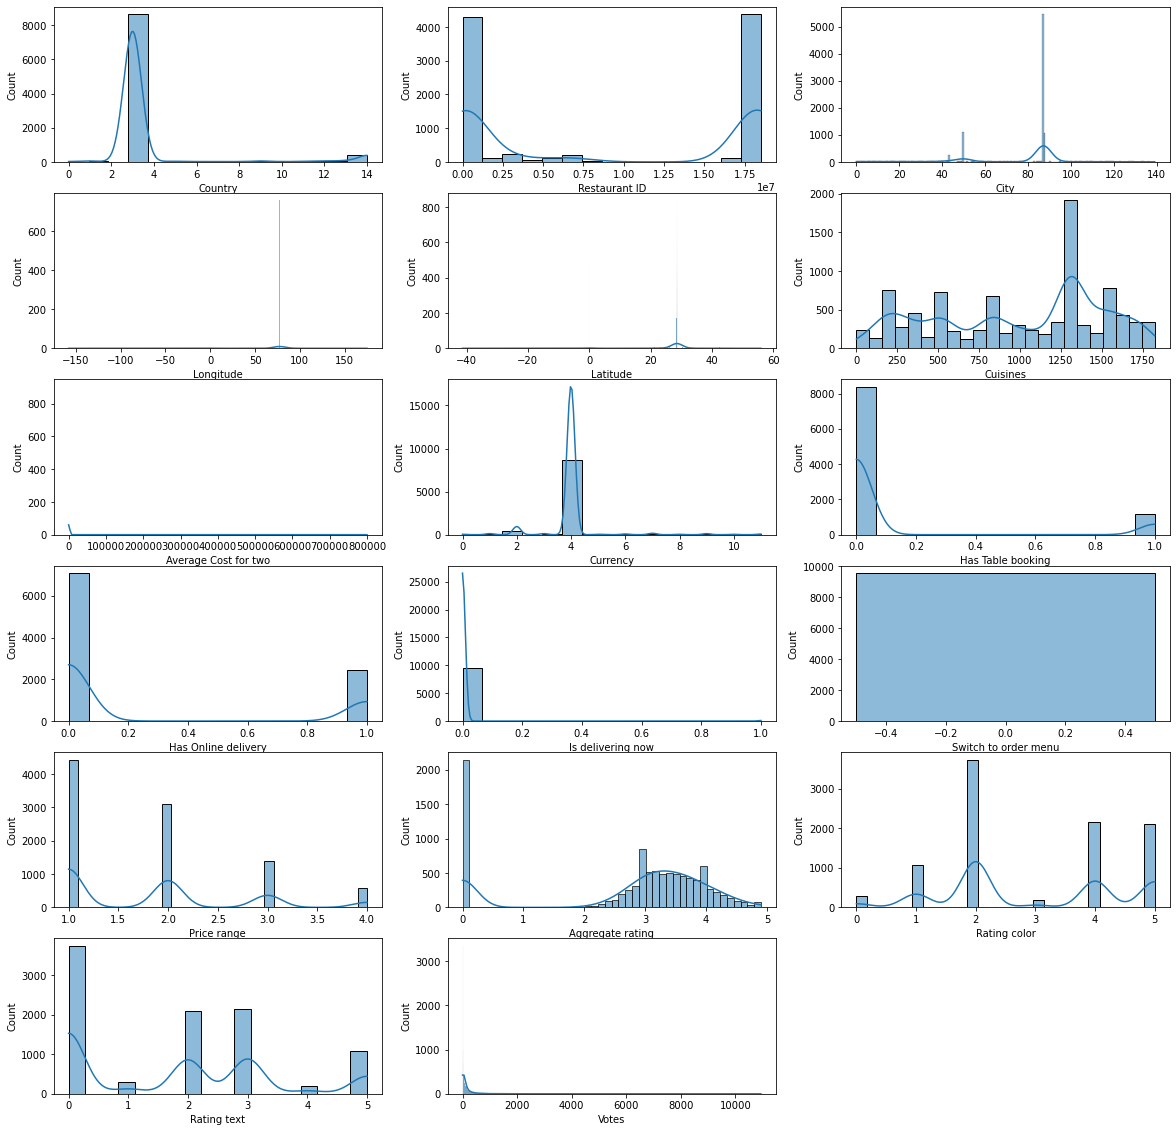

In [24]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

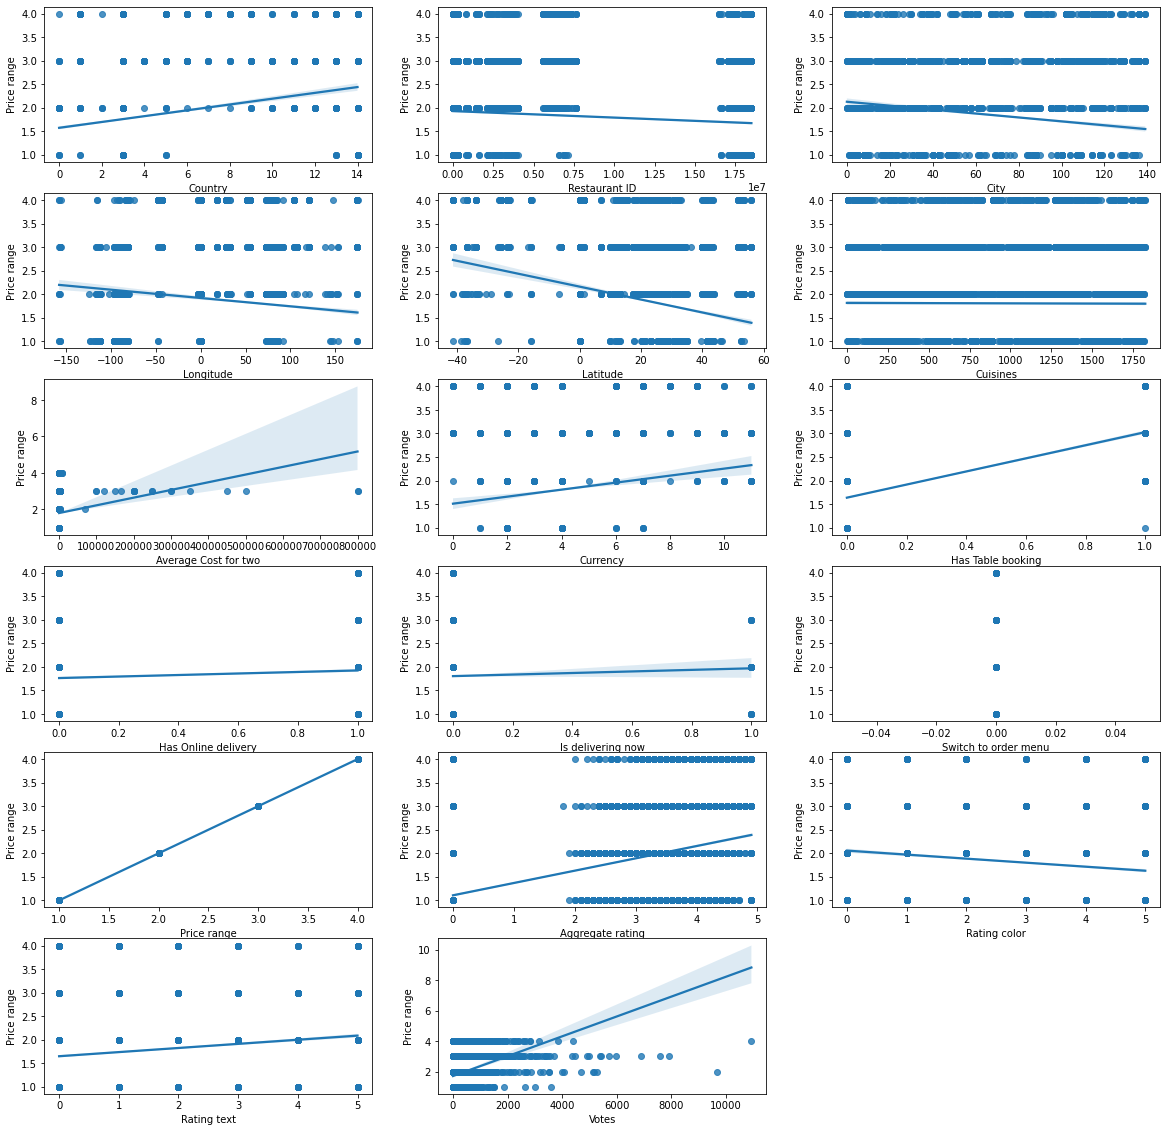

In [25]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(x=column,y='Price range',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

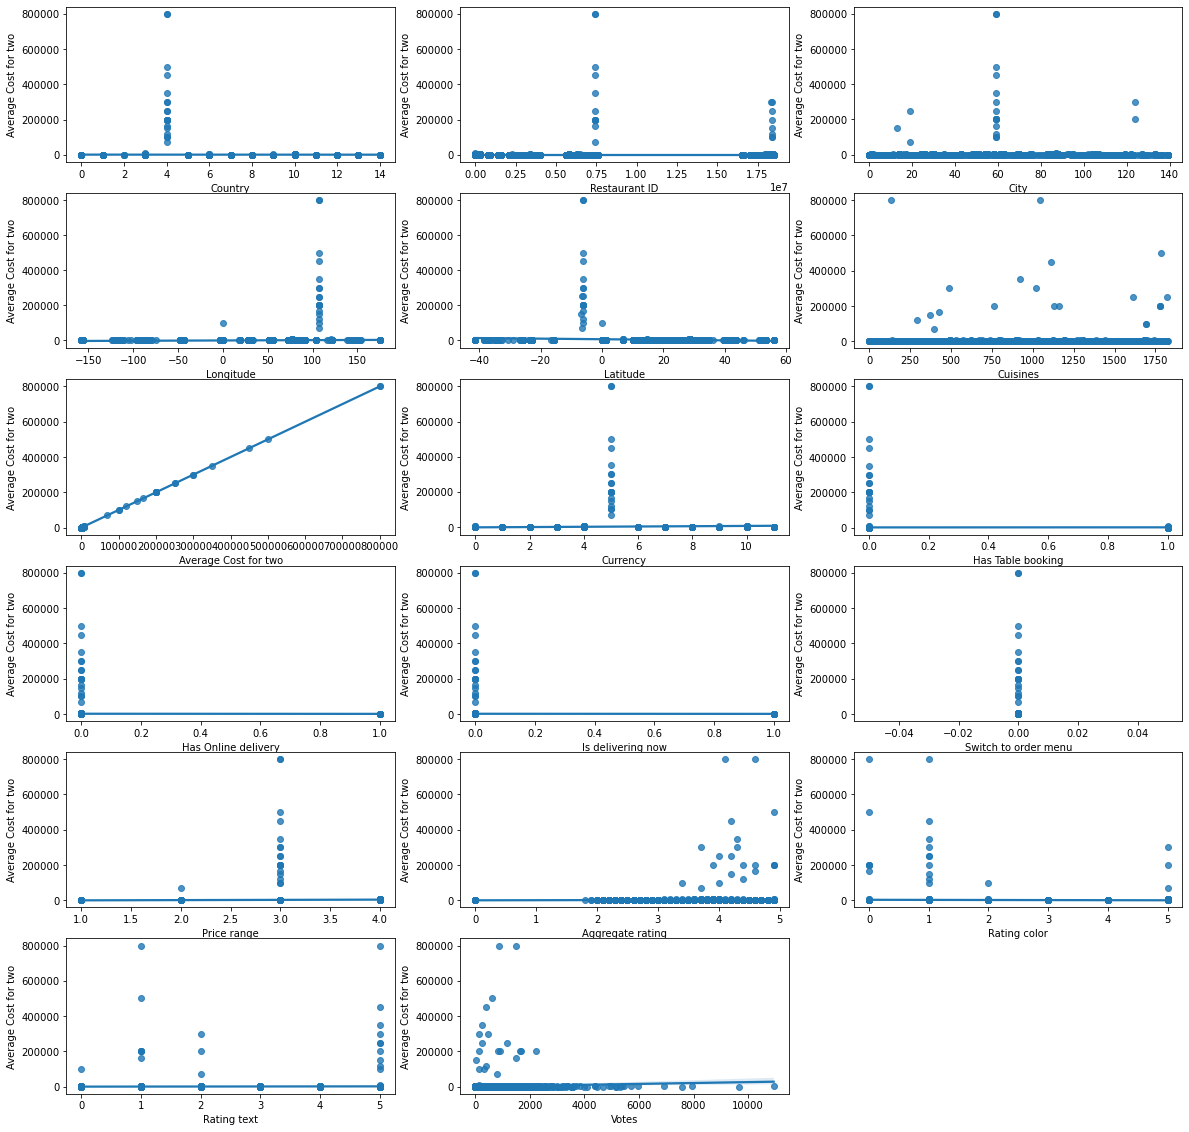

In [26]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(x=column,y='Average Cost for two',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

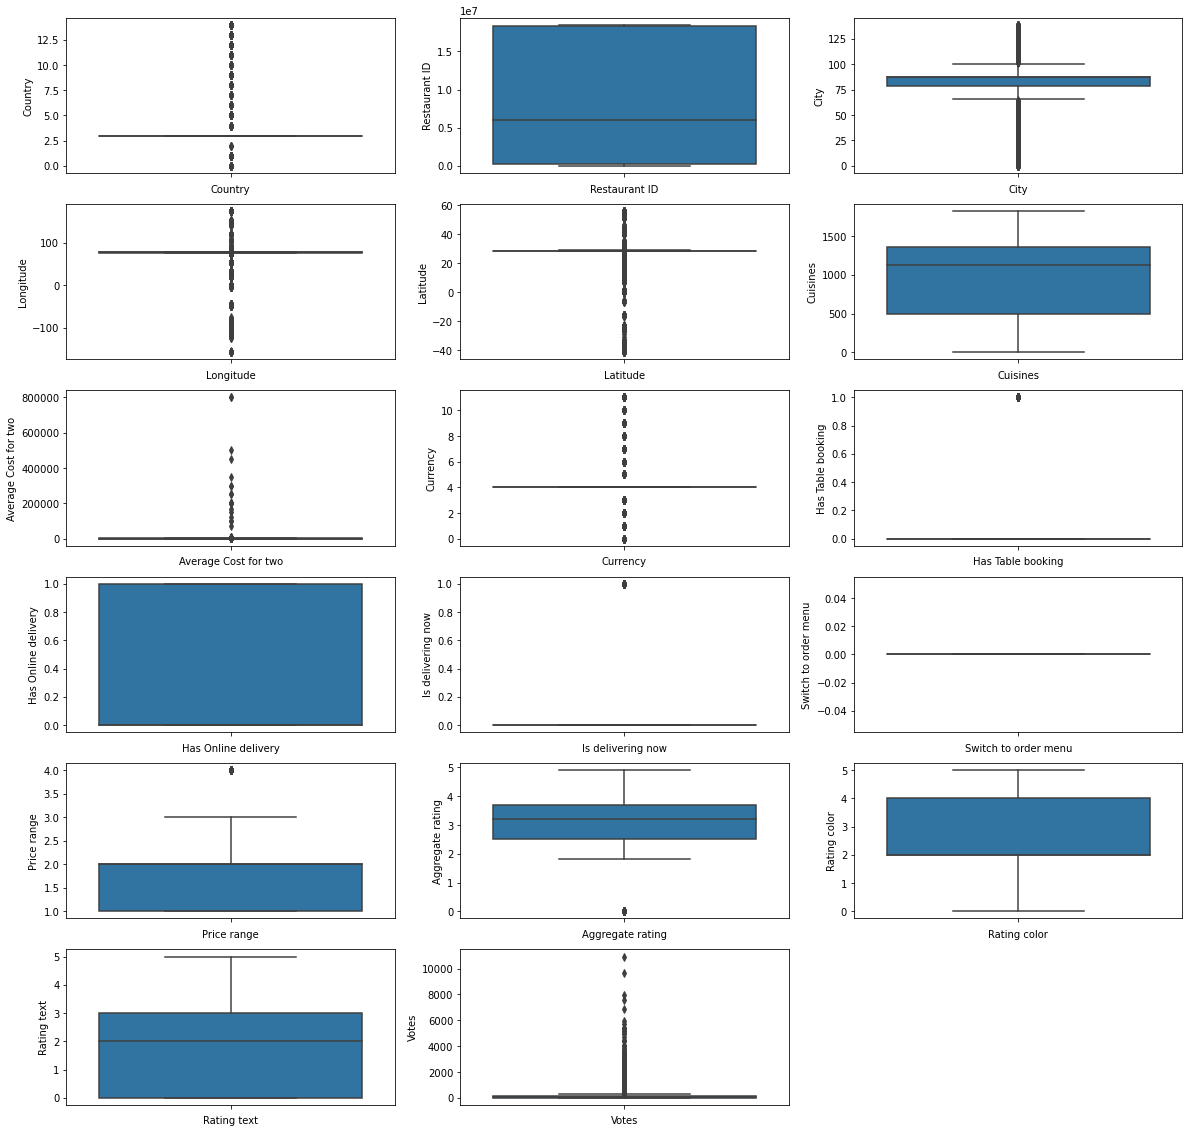

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see, we have a lot of outliers in our data that need to be removed.

In [28]:
from scipy import stats

In [30]:
from scipy.stats import zscore
print(df.shape)
z_score = zscore(df[['City','Longitude','Latitude','Votes','Average Cost for two']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(9542, 17)


(8634, 17)

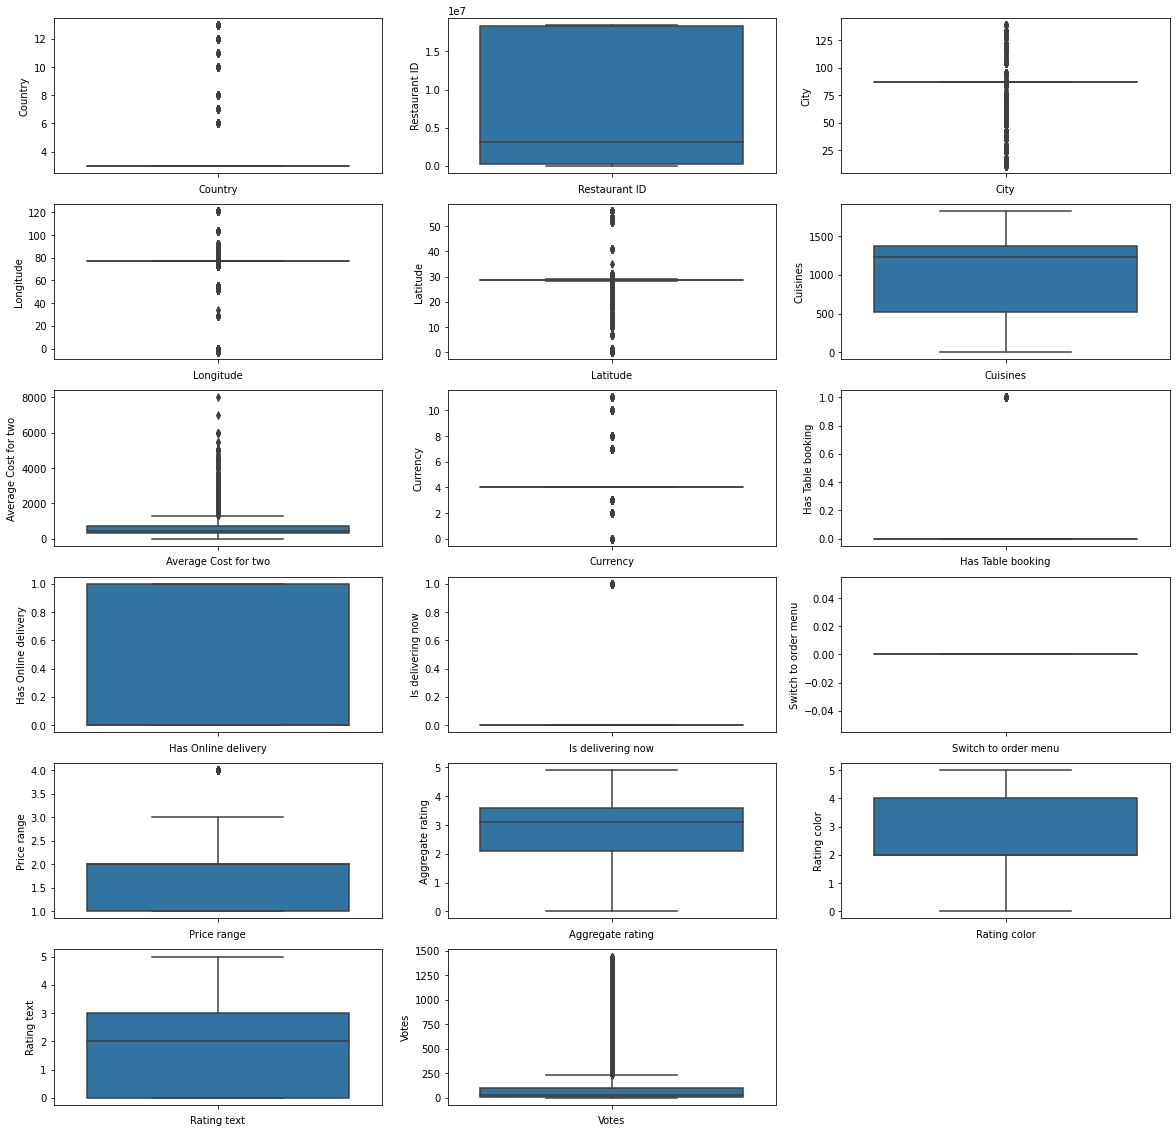

In [31]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [32]:
from scipy.stats import zscore
print(df.shape)
z_score = zscore(df[['City','Longitude','Latitude','Votes','Average Cost for two']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(8634, 17)


(7583, 17)

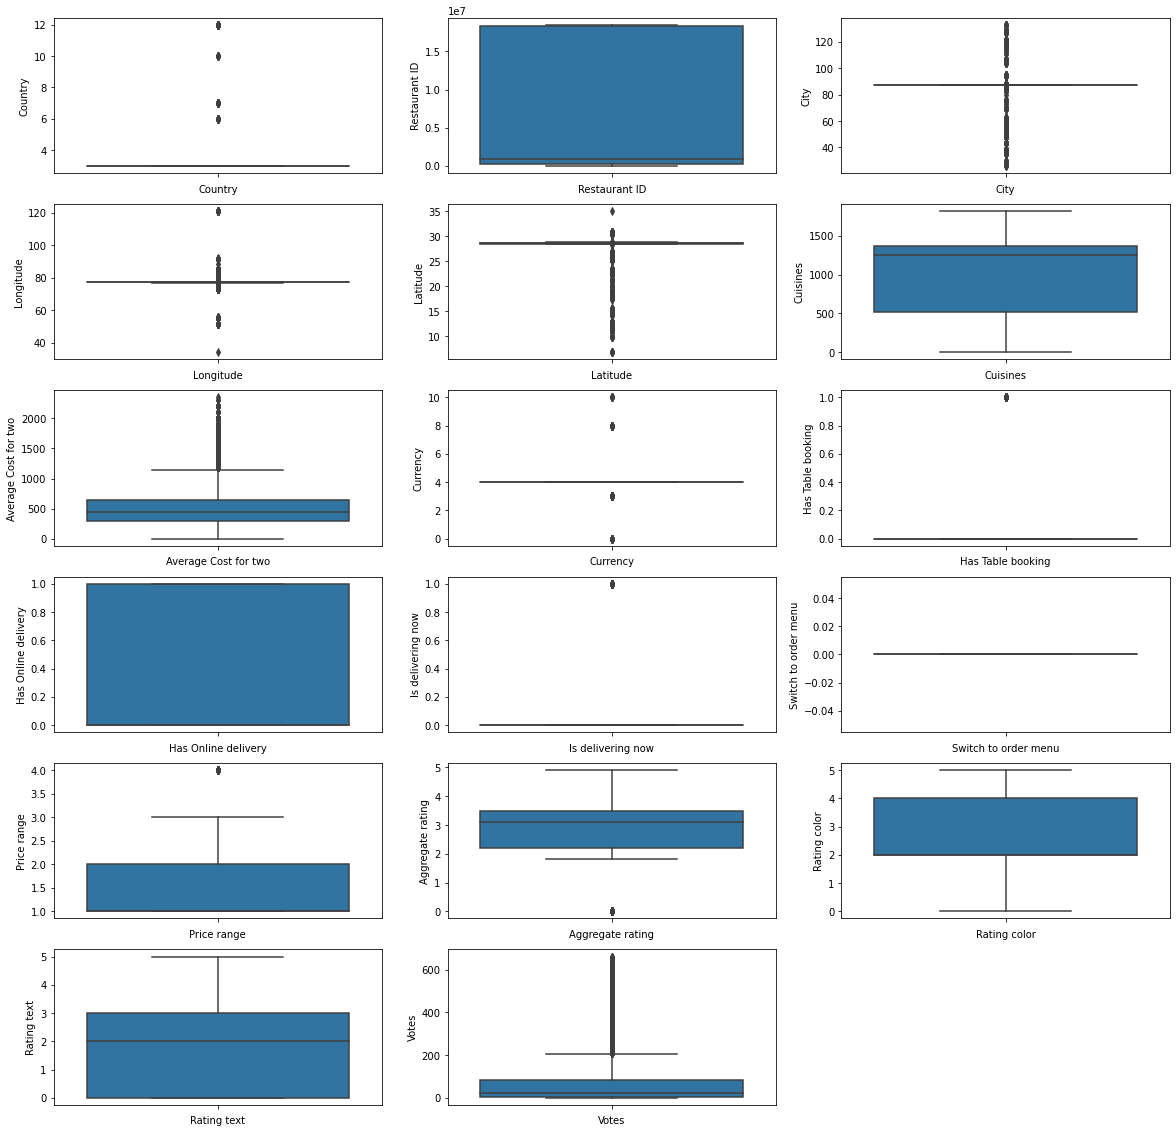

In [33]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see decrease in outliers, I will not be removing them further to maintain majority of our original dataset

Let's check the heatmap for any multi-collinearity problems

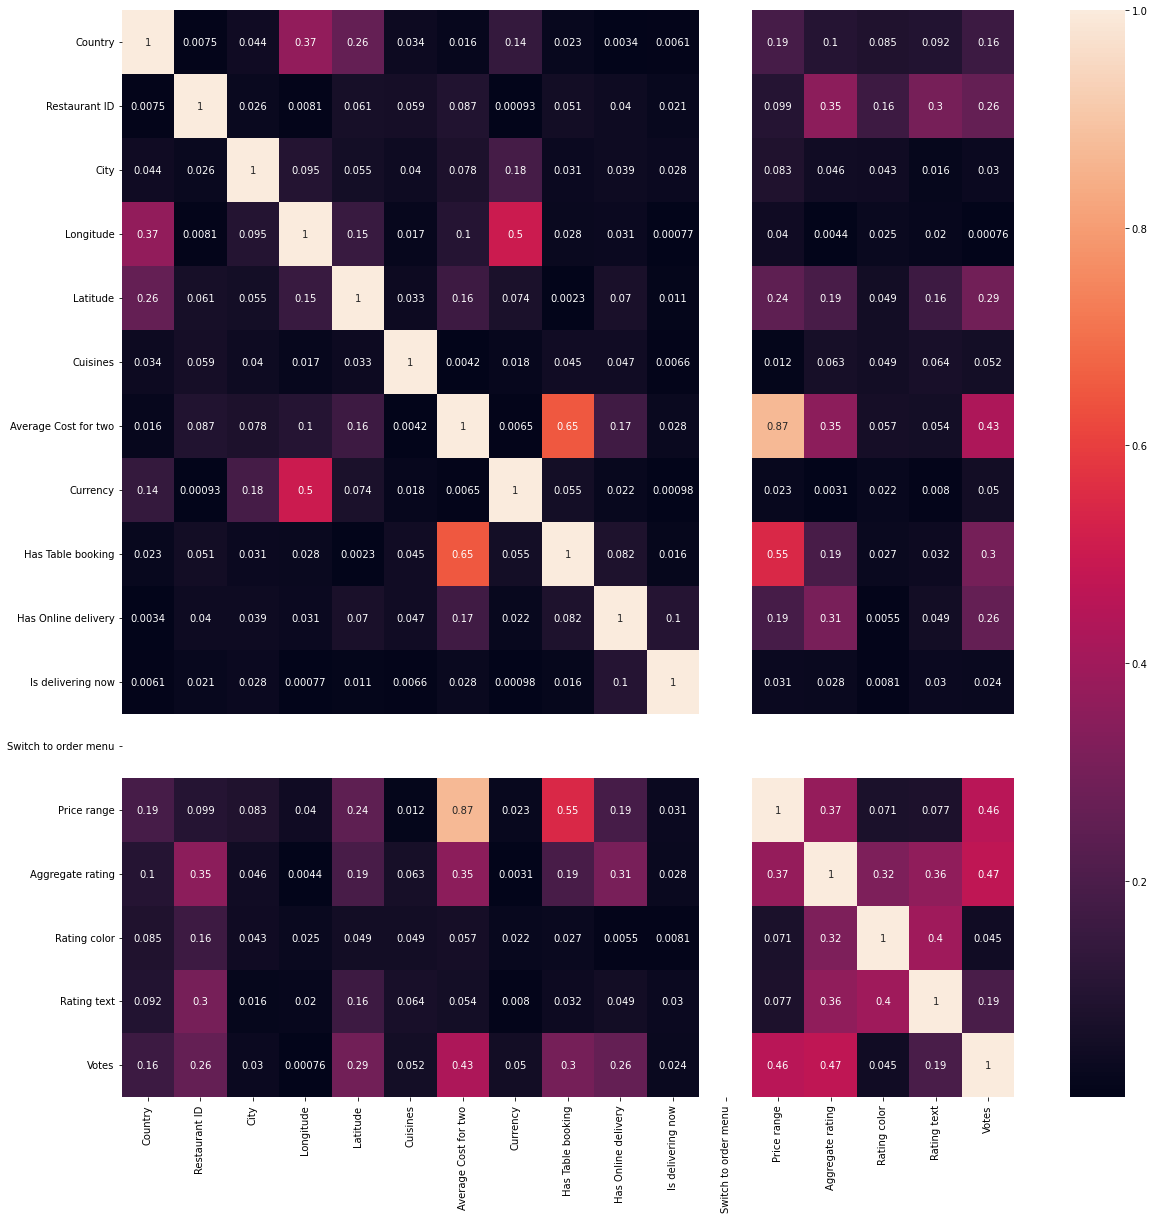

In [34]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

No need to remove any columns based on this

In [35]:
df.skew()

Country                 11.685522
Restaurant ID            0.138562
City                    -1.263632
Longitude                3.490602
Latitude                -5.923660
Cuisines                -0.356248
Average Cost for two     1.788494
Currency                 6.516357
Has Table booking        2.528560
Has Online delivery      0.883974
Is delivering now       15.299202
Switch to order menu     0.000000
Price range              1.028686
Aggregate rating        -0.911891
Rating color             0.179957
Rating text              0.480242
Votes                    2.505892
dtype: float64

Now that we have removed some of the outliers, use Power Transformer to reduce skewness

In [36]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

But before Transforming, We need to now seperate our Classification and Regression Datasets

In [37]:
x_reg = df.drop(columns = ['Average Cost for two'])
y_reg = df['Average Cost for two']

In [39]:
x_cl = df.drop(columns = ['Price range'])
y_cl = df['Price range']

Now, let's first build our Regression model

In [40]:
x_reg

,Country,Restaurant ID,City,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
182,3,72475,26,80.220672,13.086438,1330,4,1,1,0,0,2,3.8,5,2,519
186,3,18423075,26,80.257221,13.054347,398,4,0,1,0,0,1,4.2,1,5,191
194,3,72497,26,80.174568,13.026279,1529,4,1,1,0,0,2,4.4,1,5,645
201,3,18260777,29,76.972076,11.016298,377,4,0,1,0,0,3,4.6,0,1,202
202,3,3000107,29,76.995667,11.022477,1703,4,0,0,0,0,2,3.9,5,2,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,12,5602055,116,55.451955,25.288772,1008,3,0,0,0,0,3,4.8,0,1,459
9033,12,5601521,116,55.373536,25.297823,84,3,0,1,0,0,4,4.1,1,5,197
9034,12,5602377,116,55.458343,25.308412,346,3,0,0,0,0,4,4.5,0,1,143
9035,12,5602884,116,55.454251,25.311272,837,3,0,0,0,0,2,3.8,5,2,12


In [41]:
y_reg

182     800
186     450
194     850
201     800
202     600
       ... 
9032     60
9033    250
9034    150
9035     50
9036    110
Name: Average Cost for two, Length: 7583, dtype: int64

In [42]:
x_reg_scaled = scaler.fit_transform(x_reg.values)
x_reg_scaled = scaler.fit_transform(x_reg_scaled)
x_reg_scaled = scaler.fit_transform(x_reg_scaled)
x_reg_scaled

array([[ 0.        , -0.93602236, -2.16521126, ...,  1.35718851,
         0.57305126,  1.9134522 ],
       [ 0.        ,  1.03215392, -2.16521126, ..., -1.6807422 ,
         1.5694944 ,  1.27495271],
       [ 0.        , -0.9359727 , -2.16521126, ..., -1.6807422 ,
         1.5694944 ,  2.05679298],
       ...,
       [ 0.        ,  0.31641429,  3.78045835, ..., -2.95085829,
        -0.02036959,  1.09657932],
       [ 0.        ,  0.31645984,  3.78045835, ...,  1.35718851,
         0.57305126, -0.28859939],
       [ 0.        ,  0.31646505,  3.78045835, ..., -1.6807422 ,
         1.5694944 ,  0.38973526]])

Now, we use PCA to perform dimension reduction for our model

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA()

In [45]:
pca.fit_transform(x_reg_scaled)

array([[-3.54480689e+00,  7.81367916e-01,  2.68551832e+00, ...,
        -2.09676367e-02, -1.50933097e-19,  0.00000000e+00],
       [-2.10906923e+00,  9.11315422e-01,  1.52599658e+00, ...,
         5.05539594e-02, -4.62361059e-18, -0.00000000e+00],
       [-4.75817187e+00,  7.57105988e-01,  1.81285632e+00, ...,
        -3.66615460e-01, -3.15840976e-17, -0.00000000e+00],
       ...,
       [-3.24953852e+00, -1.16476875e+00,  3.66732171e-01, ...,
        -4.15797844e-01, -2.54917842e-18,  0.00000000e+00],
       [-4.41236762e-01, -9.62072973e-01,  2.38622435e+00, ...,
        -9.85099445e-01, -5.65276136e-19,  0.00000000e+00],
       [-1.95614390e+00, -9.18772704e-01,  1.88852410e+00, ...,
        -6.88242284e-01, -2.12472976e-18,  0.00000000e+00]])

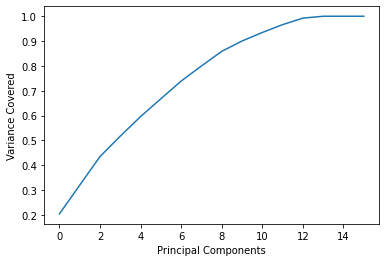

In [46]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 12 components to cover more than 95% of variance

In [47]:
pca = PCA (n_components = 12)
new_pcomp_reg = pca.fit_transform(x_reg_scaled)
princi_comp_reg = pd.DataFrame(new_pcomp_reg, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
princi_comp_reg

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.544807,0.781368,2.685518,-0.115496,-0.863786,0.412927,-1.078099,-2.844897,0.293245,-1.786833,-2.508281,-0.531790
1,-2.109069,0.911315,1.525997,-2.611676,2.354892,0.377282,-2.186602,-2.262109,-1.357759,0.099032,-1.983513,-0.835905
2,-4.758172,0.757106,1.812856,-0.850628,-0.948335,1.145194,-1.953548,-2.590060,-0.410475,-0.398778,-2.467187,-1.178589
3,-4.024769,-0.005823,0.708940,-2.836324,2.078808,0.996204,-3.069284,-1.212188,-1.656894,-0.261519,-0.336737,-0.986309
4,-1.776168,0.137245,1.940437,-2.044913,-0.809897,1.305714,-0.656550,-3.754884,-0.166266,-0.238313,-0.129747,-0.344342
...,...,...,...,...,...,...,...,...,...,...,...,...
7578,-3.946302,-1.216873,0.284522,-5.130544,-0.728344,1.619795,1.361384,4.035568,-0.297614,2.824100,1.834934,-6.037807
7579,-2.931907,-1.084640,2.360129,-4.133234,0.472753,0.731253,2.041264,4.363419,-0.773642,1.025032,1.565667,-6.817055
7580,-3.249539,-1.164769,0.366732,-5.082385,-0.275330,1.255390,0.902610,4.556560,0.089324,2.002816,2.054046,-6.242598
7581,-0.441237,-0.962073,2.386224,-3.937311,-1.047968,0.915927,2.614240,3.442705,0.545043,0.894604,1.671308,-5.890704


In [48]:
princi_comp_reg.skew()

PC1     0.174065
PC2     4.878637
PC3     0.100462
PC4    -0.025594
PC5     1.633667
PC6     5.180818
PC7    -0.163060
PC8     0.553662
PC9     0.798091
PC10    2.097240
PC11    0.871800
PC12   -1.749990
dtype: float64

In [49]:
x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(princi_comp_reg,y_reg,test_size=0.25,random_state=42)

In [50]:
lr = LinearRegression()
lr.fit(x_train_reg,y_train_reg)

LinearRegression()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
def metric_score(clf,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True):
    if train:
        y_pred_reg = clf.predict(x_train_reg)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train_reg,y_pred_reg)*100:.2f}%')
        
    elif train == False:
        pred_reg = clf.predict(x_test_reg)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test_reg,pred_reg)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x_reg,y_reg,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test_reg,pred_reg))
        print('MSE = ',mean_squared_error(y_test_reg,pred_reg))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test_reg,pred_reg)))

In [53]:
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 72.40%

 ======TESTING RESULT======
Accuracy Score: 73.12%
Cross Validation Score =  0.7696593935807992
MAE =  141.06272251280475
MSE =  42488.468394665986
RMSE =  206.12731113238243


We can note that we are getting training accuracy of 72.40% and Testing accuracy of 73.12% with Linear Regression model

We should now test the data on other models as well to check which model is giving us the best result

In [54]:
from sklearn.svm import SVR

In [55]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
svr = SVR()
xgb = XGBRegressor()

In [56]:
#TRAINING THE MODELS
knn.fit(x_train_reg,y_train_reg)
dec.fit(x_train_reg,y_train_reg)
ran.fit(x_train_reg,y_train_reg)
svr.fit(x_train_reg,y_train_reg)
xgb.fit(x_train_reg,y_train_reg)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Training and Testing accuracies for other models

In [57]:
print(lr.score(x_train_reg,y_train_reg))
print(knn.score(x_train_reg,y_train_reg))
print(dec.score(x_train_reg,y_train_reg))
print(ran.score(x_train_reg,y_train_reg))
print(svr.score(x_train_reg,y_train_reg))
print(xgb.score(x_train_reg,y_train_reg))

0.7240418452676265
0.8323631389039875
1.0
0.9747300898701723
0.4585301732932143
0.9776583575229779


In [58]:
print(lr.score(x_test_reg,y_test_reg))
print(knn.score(x_test_reg,y_test_reg))
print(dec.score(x_test_reg,y_test_reg))
print(ran.score(x_test_reg,y_test_reg))
print(svr.score(x_test_reg,y_test_reg))
print(xgb.score(x_test_reg,y_test_reg))

0.7311683683597519
0.7339502296883529
0.6860578075757913
0.8151647404492487
0.44902215760004793
0.8139367054658606


We can note, Linear Regression, KNN and Random Forest and XGB are our best models, although there's quite a lot of overfitting in all besides Linear Regression. Therefore, I'll be using Linear Reg as my model of choice

Now we need to check for overfitting

In [59]:
from sklearn.linear_model import Ridge, RidgeCV

In [60]:
ridgecv = RidgeCV(alphas = np.arange(0.0001,10,0.001),normalize=True)
ridgecv.fit(x_train_reg,y_train_reg)

RidgeCV(alphas=array([1.0000e-04, 1.1000e-03, 2.1000e-03, ..., 9.9971e+00, 9.9981e+00,
       9.9991e+00]),
        normalize=True)

In [61]:
ridgecv.alpha_

0.0021

In [62]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train_reg,y_train_reg)

Ridge(alpha=0.0021)

In [63]:
ridge_model.score(x_test_reg,y_test_reg)

0.7311683753500499

Same as our Original accuracy, therefore, no Overfitting

- Now let's perform hyperparameter tuning on our second best model 'KNN' and try and improve it's accuracy

In [64]:
params = {'algorithm':['kd_tree','brute'],
         'leaf_size':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50],
         'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50]}

In [65]:
grid_reg = GridSearchCV(knn, param_grid = params)
grid_reg.fit(x_train_reg,y_train_reg)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 30, 50],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 30, 50]})

In [66]:
print('best parameters: ',grid_reg.best_params_)

best parameters:  {'algorithm': 'kd_tree', 'leaf_size': 2, 'n_neighbors': 6}


In [67]:
knn_grid = grid_reg.best_estimator_
knn_grid.fit(x_train_reg,y_train_reg)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=2, n_neighbors=6)

In [68]:
metric_score(knn_grid,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(knn_grid,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 81.88%

 ======TESTING RESULT======
Accuracy Score: 74.16%
Cross Validation Score =  -0.019610606441647627
MAE =  127.08904711673699
MSE =  40839.902352906705
RMSE =  202.08884767078737


We do see a little increase in test accuracy, Both Linear Regression and KNN are the best fit models, but if accuracy is required, I would go for the Random Forest and XGB models.

Now, let's first try on our Classification Models

In [69]:
x_cl

,Country,Restaurant ID,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
182,3,72475,26,80.220672,13.086438,1330,800,4,1,1,0,0,3.8,5,2,519
186,3,18423075,26,80.257221,13.054347,398,450,4,0,1,0,0,4.2,1,5,191
194,3,72497,26,80.174568,13.026279,1529,850,4,1,1,0,0,4.4,1,5,645
201,3,18260777,29,76.972076,11.016298,377,800,4,0,1,0,0,4.6,0,1,202
202,3,3000107,29,76.995667,11.022477,1703,600,4,0,0,0,0,3.9,5,2,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,12,5602055,116,55.451955,25.288772,1008,60,3,0,0,0,0,4.8,0,1,459
9033,12,5601521,116,55.373536,25.297823,84,250,3,0,1,0,0,4.1,1,5,197
9034,12,5602377,116,55.458343,25.308412,346,150,3,0,0,0,0,4.5,0,1,143
9035,12,5602884,116,55.454251,25.311272,837,50,3,0,0,0,0,3.8,5,2,12


In [70]:
y_cl

182     2
186     1
194     2
201     3
202     2
       ..
9032    3
9033    4
9034    4
9035    2
9036    4
Name: Price range, Length: 7583, dtype: int64

Use Power Transformer to reduce skewness

In [71]:
x_cl_scaled = scaler.fit_transform(x_cl.values)
x_cl_scaled = scaler.fit_transform(x_cl_scaled)
x_cl_scaled = scaler.fit_transform(x_cl_scaled)
x_cl_scaled

array([[ 0.        , -0.93602236, -2.16521126, ...,  1.35718851,
         0.57305126,  1.9134522 ],
       [ 0.        ,  1.03215392, -2.16521126, ..., -1.6807422 ,
         1.5694944 ,  1.27495271],
       [ 0.        , -0.9359727 , -2.16521126, ..., -1.6807422 ,
         1.5694944 ,  2.05679298],
       ...,
       [ 0.        ,  0.31641429,  3.78045835, ..., -2.95085829,
        -0.02036959,  1.09657932],
       [ 0.        ,  0.31645984,  3.78045835, ...,  1.35718851,
         0.57305126, -0.28859939],
       [ 0.        ,  0.31646505,  3.78045835, ..., -1.6807422 ,
         1.5694944 ,  0.38973526]])

Now, we use PCA to perform dimension reduction for our model

In [73]:
pca = PCA()

In [74]:
pca.fit_transform(x_cl_scaled)

array([[-3.54858434e+00,  1.93706203e+00, -1.98547344e+00, ...,
         3.09150981e-02, -1.03780126e-18,  0.00000000e+00],
       [-2.42900289e+00,  1.40758322e+00, -1.08340568e+00, ...,
        -1.79750961e-02, -1.22314852e-17, -0.00000000e+00],
       [-4.77645866e+00,  1.40035876e+00, -1.26765053e+00, ...,
        -3.20863286e-01, -1.37833432e-16, -0.00000000e+00],
       ...,
       [-1.77525910e+00, -1.85466752e+00, -2.95542754e-02, ...,
        -4.24579488e-01, -4.33567333e-18,  0.00000000e+00],
       [ 1.33118534e+00, -6.73759094e-01, -1.46048123e+00, ...,
        -9.09891125e-01, -9.48411440e-18,  0.00000000e+00],
       [-3.29609668e-01, -8.80088499e-01, -1.09232666e+00, ...,
        -6.64622186e-01, -4.24186863e-18,  0.00000000e+00]])

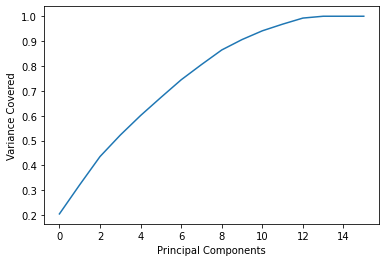

In [75]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

We can see, we only need about 12 components to cover more than 95% of variance

In [76]:
pca = PCA (n_components = 12)
new_pcomp_cl = pca.fit_transform(x_cl_scaled)
princi_comp_cl = pd.DataFrame(new_pcomp_cl, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
princi_comp_cl

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.548584,1.937062,-1.985473,-0.300062,-0.946623,-0.615581,-0.738060,-2.891571,0.486332,-1.794194,2.124691,-1.306470
1,-2.429003,1.407583,-1.083406,-2.950164,1.133658,-2.765230,-0.603051,-2.374805,-1.150378,-0.391154,1.032220,0.865358
2,-4.776459,1.400359,-1.267651,-0.808324,-1.255652,-1.541704,-1.515940,-2.790237,-0.360257,-0.451918,2.204134,0.835232
3,-3.774549,-0.000494,-0.508653,-3.005025,1.017109,-3.542467,-0.933153,-1.559036,-1.549031,-0.164601,0.968983,0.621476
4,-1.506503,0.850617,-1.397825,-2.051328,-1.260732,-0.572244,-1.521638,-3.732877,0.329072,-0.219599,0.436430,-1.254136
...,...,...,...,...,...,...,...,...,...,...,...,...
7578,-2.073253,-2.188314,0.185465,-6.122334,-1.375256,1.111997,-1.331002,3.665682,-1.008253,4.825051,4.890979,-0.093045
7579,-1.717709,-0.628936,-1.850063,-5.266465,-0.186149,1.512884,-0.464420,4.115808,-1.388298,2.732819,5.215985,1.216611
7580,-1.775259,-1.854668,-0.029554,-5.700393,-1.136478,0.373670,-0.983768,4.320598,-0.632517,3.878629,4.733667,0.434469
7581,1.331185,-0.673759,-1.460481,-5.101076,-1.309989,2.513391,-0.620940,3.281419,0.044353,2.958609,5.217168,-1.614286


In [77]:
princi_comp_cl.skew()

PC1     0.140236
PC2     2.529108
PC3     0.649374
PC4    -0.040188
PC5     3.174972
PC6    -0.086783
PC7    -4.445950
PC8     0.352255
PC9     0.648142
PC10    2.622105
PC11    1.197178
PC12    0.732756
dtype: float64

In [78]:
x_train_cl,x_test_cl,y_train_cl,y_test_cl = train_test_split(princi_comp_cl,y_cl,test_size=0.25,random_state=42)

In [79]:
ranc = RandomForestClassifier()
ranc.fit(x_train_cl,y_train_cl)

RandomForestClassifier()

In [80]:
def metric_score_cl(clf,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True):
    if train:
        y_pred_cl = clf.predict(x_train_cl)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train_cl,y_pred_cl)*100:.2f}%')
        
    elif train == False:
        pred_cl = clf.predict(x_test_cl)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test_cl,pred_cl)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test_cl,pred_cl,digits =2))

In [81]:
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 92.25%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           1       0.98      0.97      0.97       996
           2       0.90      0.93      0.91       621
           3       0.79      0.83      0.81       236
           4       0.68      0.35      0.46        43

    accuracy                           0.92      1896
   macro avg       0.84      0.77      0.79      1896
weighted avg       0.92      0.92      0.92      1896



In [82]:
pred_cl = ranc.predict(x_test_cl)

In [83]:
conf_matrix = confusion_matrix(y_test_cl,pred_cl)
conf_matrix

array([[963,  33,   0,   0],
       [ 22, 575,  23,   1],
       [  1,  33, 196,   6],
       [  0,   0,  28,  15]], dtype=int64)

We can note that we are getting training accuracy of 100% and Testing accuracy of 92.25% with Random Forest model

We should now test the data on other models as well to check which model is giving us the best result

In [84]:
from sklearn.svm import SVC

In [85]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()

In [87]:
#TRAINING THE MODELS
knn.fit(x_train_cl,y_train_cl)
dec.fit(x_train_cl,y_train_cl)
svc.fit(x_train_cl,y_train_cl)

SVC()

Check Training and Testing Accuracies for other models:

In [88]:
print(svc.score(x_train_cl,y_train_cl))
print(knn.score(x_train_cl,y_train_cl))
print(dec.score(x_train_cl,y_train_cl))
print(ranc.score(x_train_cl,y_train_cl))

0.950764902409003
0.9210480042201512
1.0
1.0


In [89]:
print(svc.score(x_test_cl,y_test_cl))
print(knn.score(x_test_cl,y_test_cl))
print(dec.score(x_test_cl,y_test_cl))
print(ranc.score(x_test_cl,y_test_cl))

0.9319620253164557
0.879746835443038
0.870253164556962
0.9224683544303798


We can note, SVC is our best performing model

Now, we perform Hyper Parameter Tuning on our best performing model, i.e., SVC

In [90]:
params = {'C':[1,5,10,15,20,25,30],
         'gamma':[0.001,0.01,0.02,0.002],
        }

In [91]:
grid_cl = GridSearchCV(svc, param_grid = params, n_jobs=-1)
grid_cl.fit(x_train_cl,y_train_cl)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 15, 20, 25, 30],
                         'gamma': [0.001, 0.01, 0.02, 0.002]})

In [92]:
print('best parameters: ',grid_cl.best_params_)

best parameters:  {'C': 30, 'gamma': 0.02}


In [93]:
svc_grid = grid_cl.best_estimator_
svc_grid.fit(x_train_cl,y_train_cl)

SVC(C=30, gamma=0.02)

In [94]:
metric_score_cl(svc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(svc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 99.07%

 ======TESTING RESULT======
Accuracy Score: 96.99%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99       996
           2       0.97      0.97      0.97       621
           3       0.90      0.91      0.90       236
           4       0.76      0.81      0.79        43

    accuracy                           0.97      1896
   macro avg       0.91      0.92      0.91      1896
weighted avg       0.97      0.97      0.97      1896



We can note great increase in both Training and Testing scores of our model (Near Perfect), Therefore we can now save our best model, i.e., Hypertuned SVC Model.